In [36]:
# IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [5]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

x = iris_df.iloc[:, [0, 1, 2, 3]].values
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

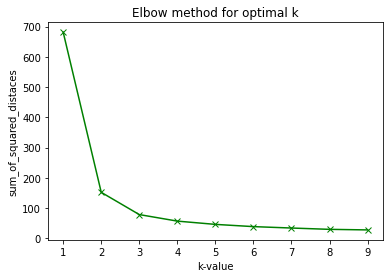

In [21]:
plt.plot(K,sum_of_squared_distances, 'gx-')
plt.xlabel('k-value')
plt.ylabel('sum_of_squared_distaces')
plt.title('Elbow method for optimal k')
plt.show()

 You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the sum_of_squared_distances doesn't decrease significantly with every iteration.From graph we can choose it as "3"

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_kmeans = km.fit_predict(x)    
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [26]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [27]:
iris_df['Labels']=y_kmeans
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Visualizing the clustering using scatter plot

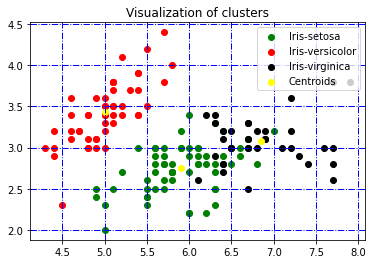

In [35]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1] , label = 'Iris-setosa', c = 'green')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1] , label = 'Iris-versicolor', c = 'red')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1] , label = 'Iris-virginica', c = 'black')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], label = 'Centroids', c = 'yellow')

plt.grid(color='blue', linestyle='-.', linewidth=1)
plt.title('Visualization of clusters')
plt.legend(loc = 'upper right')